In [3]:
from __future__ import absolute_import
from __future__  import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import cv2
import numpy as np
import os
from PIL import Image
from io import BytesIO
import time



In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7581248417004912653
]


In [5]:
def mamon_videoFightModel2(tf,wight='mamonbest947oscombo.hdfs'):
    layers = tf.keras.layers
    models = tf.keras.models
    losses = tf.keras.losses
    optimizers = tf.keras.optimizers
    metrics = tf.keras.metrics
    num_classes = 2
    cnn = models.Sequential()
    #cnn.add(base_model)

    input_shapes=(160,160,3)
    np.random.seed(1234)
    vg19 = tf.keras.applications.vgg19.VGG19
    base_model = vg19(include_top=False,weights='imagenet',input_shape=(160, 160,3))
    # Freeze the layers except the last 4 layers
    #for layer in base_model.layers:
    #    layer.trainable = False

    cnn = models.Sequential()
    cnn.add(base_model)
    cnn.add(layers.Flatten())
    model = models.Sequential()

    model.add(layers.TimeDistributed(cnn,  input_shape=(30, 160, 160, 3)))
    model.add(layers.LSTM(30 , return_sequences= True))

    model.add(layers.TimeDistributed(layers.Dense(90)))
    model.add(layers.Dropout(0.1))

    model.add(layers.GlobalAveragePooling1D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(num_classes, activation="sigmoid"))

    adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.load_weights(wight)
    rms = optimizers.RMSprop()

    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

    return model


In [6]:
import numpy as np
from skimage.transform import resize
np.random.seed(1234)
model22 = mamon_videoFightModel2(tf)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model22._make_predict_function()


In [8]:
def video_mamonreader(cv2,filename):
    frames = np.zeros((30, 160, 160, 3), dtype=np.float)
    i=0
    print(frames.shape)
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
    frm = resize(frame,(160,160,3))
    frm = np.expand_dims(frm,axis=0)
    if(np.max(frm)>1):
        frm = frm/255.0
    frames[i][:] = frm
    i +=1
    print("reading video")
    while i < 30:
        rval, frame = vc.read()
        frm = resize(frame,(160,160,3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
    return frames

In [9]:
def pred_fight(model,video,acuracy=0.9):
    pred_test = model.predict(video)
    if pred_test[0][1] >=acuracy:
        return True , pred_test[0][1]
    else:
        return False , pred_test[0][1]

In [10]:
def main_fight(vidoss):
    vid = video_mamonreader(cv2,vidoss)
    datav = np.zeros((1, 30, 160, 160, 3), dtype=np.float)
    datav[0][:][:] = vid
    millis = int(round(time.time() * 1000))
    print(millis)
    f , precent = pred_fight(model22,datav,acuracy=0.65)
    millis2 = int(round(time.time() * 1000))
    print(millis2)
    res_mamon = {'fight':f , 'precentegeoffight':str(precent)}
    res_mamon['processing_time'] =  str(millis2-millis)
    return res_mamon

In [ ]:
res

In [ ]:
res

In [12]:
import os

return_list = []

for file in os.listdir("E:/dataset/yes/"):

                       if file.endswith(".avi"):
                           path=os.path.join("E:/dataset/yes/",file)
                           res=main_fight(path)
                           return_list.append(res)
                
                        
                           
                    
print(return_list)
print()

(30, 160, 160, 3)
reading video
1591108962165
1591108976056
(30, 160, 160, 3)
reading video
1591108978744
1591108992362
(30, 160, 160, 3)
reading video
1591108995106
1591109008623
(30, 160, 160, 3)
reading video
1591109011433
1591109024873
(30, 160, 160, 3)
reading video
1591109027623
1591109041030
(30, 160, 160, 3)
reading video
1591109043560
1591109056864
(30, 160, 160, 3)
reading video
1591109059398
1591109072669
(30, 160, 160, 3)
reading video
1591109075182
1591109088427
(30, 160, 160, 3)
reading video
1591109090989
1591109104284
(30, 160, 160, 3)
reading video
1591109106837
1591109120111
(30, 160, 160, 3)
reading video
1591109122687
1591109136045
(30, 160, 160, 3)
reading video
1591109138567
1591109151829
(30, 160, 160, 3)
reading video
1591109154338
1591109167789
(30, 160, 160, 3)
reading video
1591109170294
1591109183793
(30, 160, 160, 3)
reading video
1591109186425
1591109200039
(30, 160, 160, 3)
reading video
1591109202624
1591109216430
(30, 160, 160, 3)
reading video
15911092

In [13]:
import os

return_list1 = []

for file in os.listdir("E:/dataset/no/"):

                       if file.endswith(".mpg"):
                           path=os.path.join("E:/dataset/no/",file)
                           res1=main_fight(path)
                           return_list1.append(res1)
                
                        
                           
                    
print(return_list1)
print()

(30, 160, 160, 3)
reading video
1591119834426
1591119848543
(30, 160, 160, 3)
reading video
1591119855800
1591119866810
(30, 160, 160, 3)
reading video
1591119868583
1591119879165
(30, 160, 160, 3)
reading video
1591119880913
1591119891739
(30, 160, 160, 3)
reading video
1591119893558
1591119904173
(30, 160, 160, 3)
reading video
1591119905967
1591119916468
(30, 160, 160, 3)
reading video
1591119918105
1591119928684
(30, 160, 160, 3)
reading video
1591119930363
1591119940826
(30, 160, 160, 3)
reading video
1591119942584
1591119953039
(30, 160, 160, 3)
reading video
1591119954702
1591119965223
(30, 160, 160, 3)
reading video
1591119966903
1591119977485
(30, 160, 160, 3)
reading video
1591119979107
1591119989578
(30, 160, 160, 3)
reading video
1591119991212
1591120001847
(30, 160, 160, 3)
reading video
1591120003675
1591120014161
(30, 160, 160, 3)
reading video
1591120015853
1591120026327
(30, 160, 160, 3)
reading video
1591120028025
1591120038537
(30, 160, 160, 3)
reading video
15911200

In [6]:
import matplotlib.pyplot as plt

for otem in return_list:
    for item in otem:
        print(otem[item])


In [7]:
for otem in return_list:
    print (otem["precentegeoffight"])


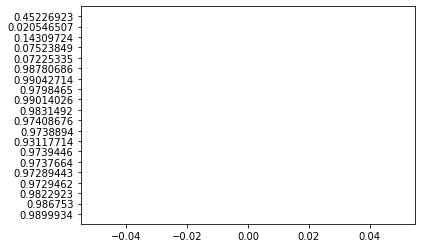

In [28]:
import matplotlib.pyplot as plt
days= range(1,21)

for otem in return_list:
    line_chart1=plt.plot(otem["precentegeoffight"])
    plt.show
    




[]


[997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997, 997]


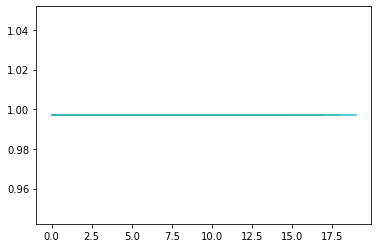

In [78]:
dora1=[]
dixy1=[]
for otem1 in return_list1:
    dora1.append(float(otem1["precentegeoffight"]))
    plt.plot(dora1)
for item in dora1:
    dixy1.append(int(item*1000))
print(dixy1)


    

[0.99508226, 0.9951514, 0.99544275, 0.9948932, 0.9960542, 0.9767379, 0.99549145, 0.99352694, 0.99647623, 0.99646276, 0.99488574, 0.99508226, 0.99232227, 0.995856, 0.9963819, 0.9964413, 0.99706703, 0.99575233, 0.9952991, 0.993834]


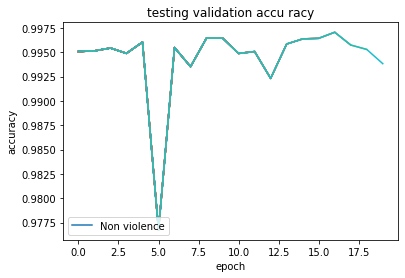

In [69]:
import matplotlib.pyplot as plt
dora=[]
dore=[]
for otem in return_list:
    dora.append(float(otem["precentegeoffight"]))
    plt.plot(dora)

plt.title('testing validation accu racy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Non violence'], loc=3)
plt.show
print(dora)
   



[0.99508226, 0.9951514, 0.99544275, 0.9948932, 0.9960542, 0.9767379, 0.99549145, 0.99352694, 0.99647623, 0.99646276, 0.99488574, 0.99508226, 0.99232227, 0.995856, 0.9963819, 0.9964413, 0.99706703, 0.99575233, 0.9952991, 0.993834]


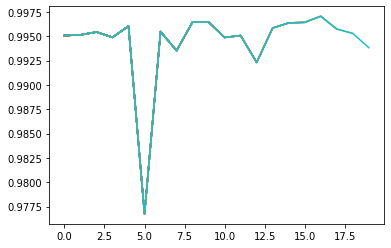

In [80]:
import matplotlib.pyplot as plt
dora=[]
for otem in return_list:
    dora.append(float(otem["precentegeoffight"]))
    plt.plot( dora)
plt.show

print(dora)




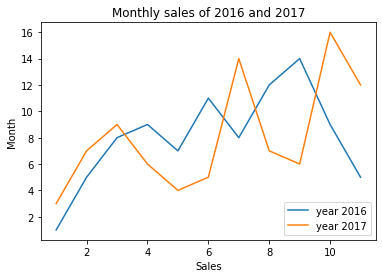

In [71]:
import matplotlib.pyplot as plt
sales1 = [1, 5, 8, 9, 7, 11, 8, 12, 14, 9, 5]
sales2 = [3, 7, 9, 6, 4, 5, 14, 7, 6, 16, 12]
line_chart1 = plt.plot(range(1,12), sales1)
line_chart2 = plt.plot(range(1,12), sales2)
plt.title('Monthly sales of 2016 and 2017')
plt.xlabel('Sales')
plt.ylabel('Month')
plt.legend(['year 2016', 'year 2017'], loc=4)
plt.show()

In [16]:
import matplotlib.pyplot as plt
dora=[]
for otem in return_list:
    dora.append(float(otem["precentegeoffight"]))
plt1=plt.plot(dora)
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

In [17]:

res = main_fight('12.avi')



(30, 160, 160, 3)
reading video
1591120243177
1591120253835


In [68]:
res


{'fight': True, 'precentegeoffight': '0.99706703', 'processing_time': '41196'}

true positives of fights detected in violent clips
[995, 995, 995, 994, 996, 976, 995, 993, 996, 996, 994, 995, 992, 995, 996, 996, 997, 995, 995, 993]
true positives of fights detected in violent clips
[5, 5, 5, 6, 4, 24, 5, 7, 4, 4, 6, 5, 8, 5, 4, 4, 3, 5, 5, 7]


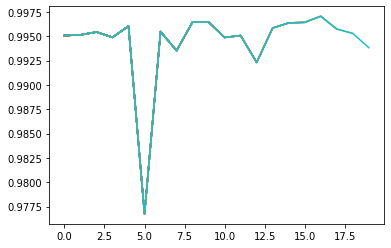

In [24]:
dora=[]
dixy=[]
dixy2=[]
print("true positives of fights detected in violent clips")
for otem in return_list:
    dora.append(float(otem["precentegeoffight"]))
    plt.plot(dora)    
for item in dora:
    dixy.append(int(item*1000))

for item in dora:
    dixy2.append(1000-int(item*1000))
print(dixy)
print("False negatives of fights detected in violent clips")
print(dixy2)


true negatives of fights detected in violent clips
[995, 995, 995, 995, 994, 994, 994, 995, 995, 995, 995, 995, 995, 995, 995, 995, 995, 995, 995, 994]
False positives of fights detected in violent clips
[5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]


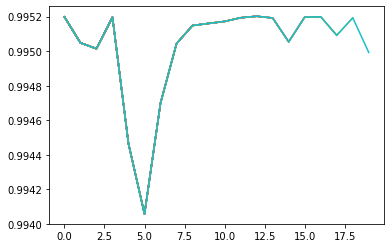

In [29]:
dora1=[]
dixy1=[]
dixy3=[]
print("true negatives of fights detected in violent clips")
for otem1 in return_list1:
    dora1.append(1-float(otem1["precentegeoffight"]))
    plt.plot(dora1)
for item1 in dora1:
    dixy1.append(int(item1*1000))
print(dixy1)
for item in dora1:
    dixy3.append(1000-int(item*1000))

print("False positives of fights detected in violent clips")
print(dixy3)



In [27]:
tp=0
for item in dixy:
    print(item)
    tp+=item
print(tp)

995
995
995
994
996
976
995
993
996
996
994
995
992
995
996
996
997
995
995
993
19879


In [92]:
tn=0
for item in dixy1:
    print(item)
    tn+=item
print(tn)

995
995
995
995
994
994
994
995
995
995
995
995
995
995
995
995
995
995
995
994
19896


In [94]:
fp= 1000*20-tn
fn= 1000*20-tp

In [96]:
pre= tp/(tp+fp)
recal=tp/(tp+fn)

In [104]:
print(pre,recal,f1)

0.9947955762398039 0.99395 0.9943726083585525


In [103]:
f1=2*((pre*recal)/(pre+recal))